In [1]:
# You need to install the latest version of dask and distributed
# pip install git+https://github.com/dask/dask.git (--upgrade)
# pip install git+https://github.com/dask/distributed.git (--upgrade)

In [2]:
import sys
# Assuming we are in the notebook directory add this so that we can import the library
sys.path.append('..')

from abcpy.core import *
from abcpy.distributions import *
from distributed import Client

from dask.dot import dot_graph

In [3]:
c = Client()
c

<Client: scheduler="127.0.0.1:54739" processes=8 cores=8>

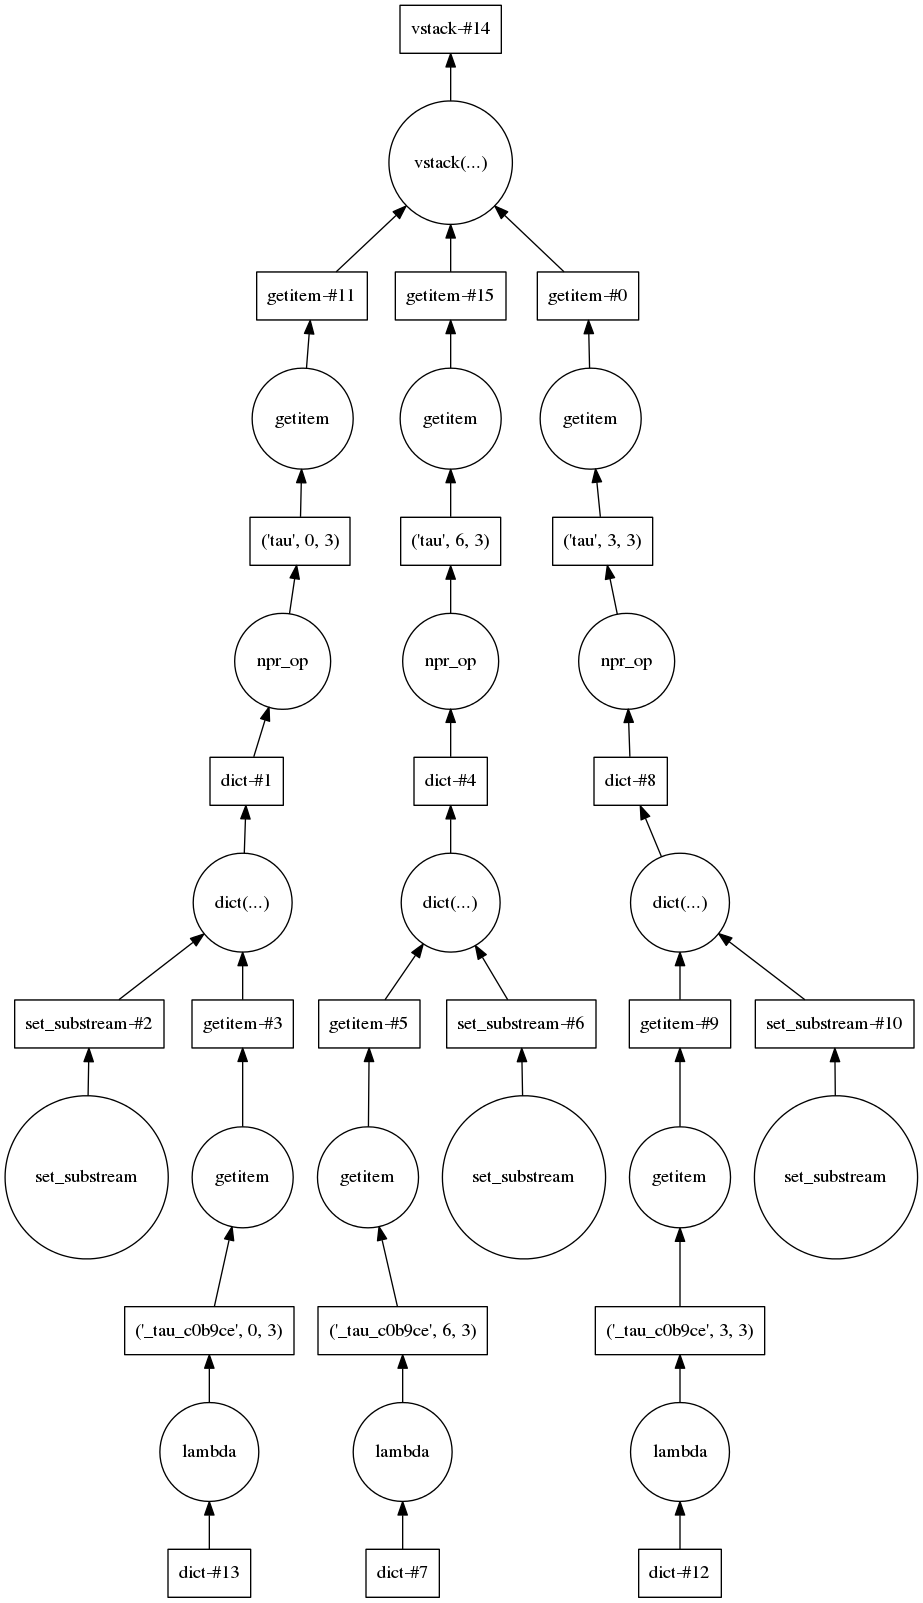

In [10]:
tau = NumpyRV('tau', 'normal', 5)
values = tau.generate(9, batch_size=3)

# Draw the dask graph
dot_graph(values.dask)

In [11]:
# You can see the dask graph dictionary with
values.dask

{'getitem-2cf042c2098a6d1c684be549323904b1': (<function _operator.getitem>,
  ('tau', 3, 3),
  'data'),
 'dict-fb96e33c8f477a5742678665cbe5703c': (dict,
  [['data', (tuple, ['getitem-c10e54e306948bda142d38b2f3389945'])],
   ['index', 0],
   ['n', 3],
   ['random_state', 'set_substream-4fe42326f11e5cca4798d2a94e79355b']]),
 ('tau',
  0,
  3): (functools.partial(<function npr_op at 0x7f675c307bf8>, 'normal', (1,)), 'dict-fb96e33c8f477a5742678665cbe5703c'),
 'dict-20cdda89919c68898729a1c40088a652': (dict,
  [['data', (tuple, ['getitem-4e294198482a6ae0151a9900c16e9a45'])],
   ['index', 6],
   ['n', 3],
   ['random_state', 'set_substream-63c82ebd9d2cd724889c47c03bba8544']]),
 'getitem-4e294198482a6ae0151a9900c16e9a45': (<function _operator.getitem>,
  ('_tau_c0b9ce', 6, 3),
  'data'),
 'set_substream-4fe42326f11e5cca4798d2a94e79355b': (<function abcpy.core.set_substream>,
  0,
  6),
 'dict-a26b2d2d39b990e0c9700d4eb3b06c26': {'data': (), 'index': 6, 'n': 3},
 'dict-f3326c828e0692bb08326098f0

In [13]:
# Finally compute the values
c.compute(values, sync=True)

array([[ 4.68821633],
       [ 5.72900392],
       [ 5.21782079],
       [ 6.6905257 ],
       [ 4.53406263],
       [ 5.03282016],
       [ 5.09120472],
       [ 6.09128273],
       [ 3.05302969]])